# Explore here

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [85]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [86]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [87]:
df.shape

(20640, 9)

In [88]:
X = df[['Latitude', 'Longitude', 'MedInc']]

Escalar datos 

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Aplicar Kmeas 

In [90]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [91]:
df['cluster'] = clusters

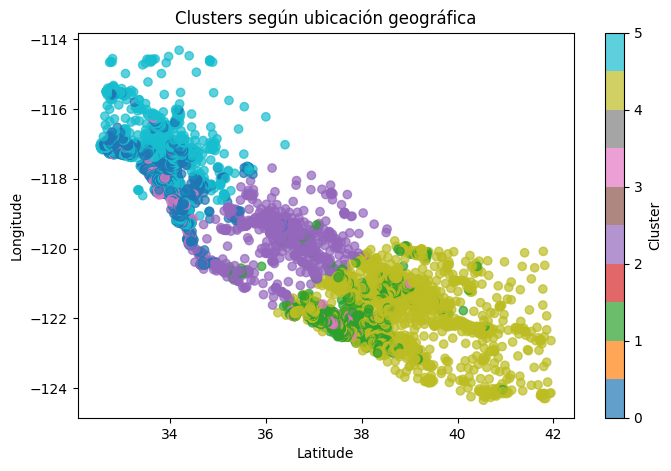

In [92]:
plt.figure(figsize=(8,5))
plt.scatter(df['Latitude'], df['Longitude'], c=df['cluster'], cmap='tab10', alpha=0.7)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters según ubicación geográfica')
plt.colorbar(label='Cluster')
plt.show()

Dividir datos 

In [93]:
X = df[['Latitude', 'Longitude', 'MedInc']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)



Entrena Kmeas 

In [94]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


Predice clusters 

In [95]:
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

Grafica

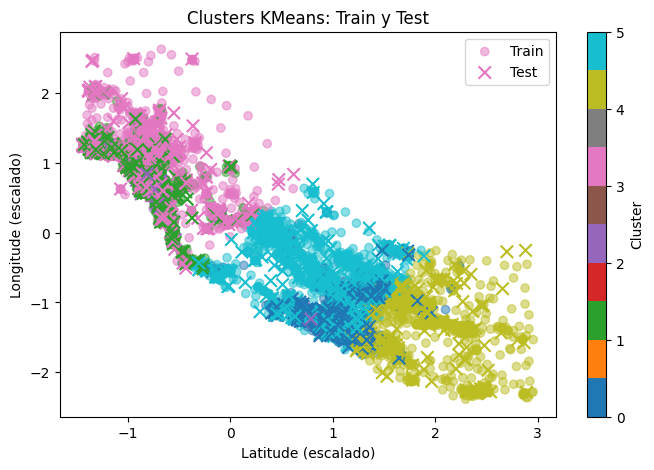

In [96]:
plt.figure(figsize=(8,5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_clusters, cmap='tab10', alpha=0.5, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters, cmap='tab10', marker='x', s=80, label='Test')
plt.xlabel('Latitude (escalado)')
plt.ylabel('Longitude (escalado)')
plt.title('Clusters KMeans: Train y Test')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

sando clusters de kmeans para el conjunto de entrenamiento

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, train_clusters)

y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(test_clusters, y_pred))
print("Classification report:\n", classification_report(test_clusters, y_pred))
print("Confusion matrix:\n", confusion_matrix(test_clusters, y_pred))

Accuracy: 0.9937015503875969
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       557
           1       0.99      1.00      1.00       897
           2       1.00      0.97      0.99       116
           3       1.00      1.00      1.00      1397
           4       0.98      0.98      0.98       246
           5       0.99      0.99      0.99       915

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128

Confusion matrix:
 [[ 555    0    0    0    2    0]
 [   0  895    0    1    0    1]
 [   1    2  113    0    0    0]
 [   0    3    0 1393    0    1]
 [   0    0    0    0  241    5]
 [   6    0    0    0    4  905]]


Los clusters tienen sentido y pueden ser identificados fácilmente. Vemos un accuracy alto y metricas buenas significa que las caracteristicas seleccionadas funcioinan y validan el proceso.